In [1]:
import pandas as pd                     #data processing
import numpy as np                      #liner algebra
import matplotlib.pyplot as plt         #graphs
import seaborn as sns                   #visualizations

In [2]:
#Imporing the CSV dataset
train=pd.read_csv(r"data-crunch/train.csv",na_values=['??','????'])
test=pd.read_csv(r"data-crunch/test.csv",na_values=['??','????'])
submission=pd.read_csv(r"data-crunch/SubmissionSample.csv",na_values=['??','????'])

#Making a copy of the original dataset for working
train_orig=train.copy(deep=True)
test_orig=test.copy(deep=True)

In [3]:
test.columns


Index(['Loan.ID', 'Current.Loan.Amount', 'Term', 'Credit.Score',
       'Years.in.current.job', 'Home.Ownership', 'Annual.Income', 'Purpose',
       'Monthly.Debt', 'Years.of.Credit.History',
       'Months.since.last.delinquent', 'Number.of.Open.Accounts',
       'Number.of.Credit.Problems', 'Current.Credit.Balance',
       'Maximum.Open.Credit', 'Bankruptcies', 'Tax.Liens', 'Loan.Status'],
      dtype='object')

In [4]:
train.isnull().sum()

Loan.ID                             0
Current.Loan.Amount                 0
Term                                0
Credit.Score                    12229
Years.in.current.job             2529
Home.Ownership                      0
Annual.Income                   12229
Purpose                             0
Monthly.Debt                        0
Years.of.Credit.History             0
Months.since.last.delinquent    32475
Number.of.Open.Accounts             0
Number.of.Credit.Problems           0
Current.Credit.Balance              0
Maximum.Open.Credit                 0
Bankruptcies                      127
Tax.Liens                           2
Loan.Status                         0
dtype: int64

In [5]:
# converting all strings to numeric
train["Years.in.current.job"].replace("10+ years",10,inplace=True)
train['Years.in.current.job'].replace(to_replace=' year', value='', regex=True, inplace=True)
test['Years.in.current.job'].replace(to_replace=' years', value='', regex=True, inplace=True)
train['Years.in.current.job'] = pd.to_numeric(train['Years.in.current.job'], errors='coerce')
test['Years.in.current.job'] = pd.to_numeric(test['Years.in.current.job'], errors='coerce')

train["Term"].replace("Short Term",1.5,inplace=True)
train["Term"].replace("Long Term",30,inplace=True)
test["Term"].replace("Short Term",1.5,inplace=True)
test["Term"].replace("Long Term",30,inplace=True)



In [6]:
train["Credit.Score"].fillna(train["Credit.Score"].median(),inplace=True)
test["Credit.Score"].fillna(test["Credit.Score"].median(),inplace=True)

train["Years.in.current.job"].fillna(train["Years.in.current.job"].median(),inplace=True)
test["Years.in.current.job"].fillna(test["Years.in.current.job"].median(),inplace=True)

train["Annual.Income"].fillna(train["Annual.Income"].median(),inplace=True)
test["Annual.Income"].fillna(test["Annual.Income"].median(),inplace=True)

train["Months.since.last.delinquent"].fillna(train["Months.since.last.delinquent"].median(),inplace=True)
test["Months.since.last.delinquent"].fillna(test["Months.since.last.delinquent"].median(),inplace=True)

train["Bankruptcies"].fillna(train["Bankruptcies"].median(),inplace=True)
test["Bankruptcies"].fillna(test["Bankruptcies"].median(),inplace=True)

In [7]:
train_id=train["Loan.ID"]
test_id=test["Loan.ID"]
train=train.drop("Loan.ID",axis=1)
test=test.drop("Loan.ID",axis=1)
train.isnull().sum()

Current.Loan.Amount             0
Term                            0
Credit.Score                    0
Years.in.current.job            0
Home.Ownership                  0
Annual.Income                   0
Purpose                         0
Monthly.Debt                    0
Years.of.Credit.History         0
Months.since.last.delinquent    0
Number.of.Open.Accounts         0
Number.of.Credit.Problems       0
Current.Credit.Balance          0
Maximum.Open.Credit             0
Bankruptcies                    0
Tax.Liens                       2
Loan.Status                     0
dtype: int64

In [8]:
train_back=train.copy()
test_back=test.copy()
train.isnull().sum()

Current.Loan.Amount             0
Term                            0
Credit.Score                    0
Years.in.current.job            0
Home.Ownership                  0
Annual.Income                   0
Purpose                         0
Monthly.Debt                    0
Years.of.Credit.History         0
Months.since.last.delinquent    0
Number.of.Open.Accounts         0
Number.of.Credit.Problems       0
Current.Credit.Balance          0
Maximum.Open.Credit             0
Bankruptcies                    0
Tax.Liens                       2
Loan.Status                     0
dtype: int64

In [9]:
train[10:20]

,Current.Loan.Amount,Term,Credit.Score,Years.in.current.job,Home.Ownership,Annual.Income,Purpose,Monthly.Debt,Years.of.Credit.History,Months.since.last.delinquent,Number.of.Open.Accounts,Number.of.Credit.Problems,Current.Credit.Balance,Maximum.Open.Credit,Bankruptcies,Tax.Liens,Loan.Status
10,20044,1.5,741.0,10.0,Home Mortgage,91200.0,Debt Consolidation,703.76,14.9,32.0,8,0,20523,25369,0.0,0.0,1
11,12473,1.5,726.0,10.0,Home Mortgage,61576.0,other,821.60,13.7,67.0,6,0,7876,10730,0.0,0.0,1
12,3920,1.5,726.0,10.0,Rent,61576.0,Debt Consolidation,406.74,10.4,32.0,8,4,4776,7545,3.0,0.0,1
13,4836,1.5,723.0,10.0,Home Mortgage,75563.0,Debt Consolidation,585.61,13.4,32.0,13,0,22361,30341,0.0,0.0,1
14,6162,1.5,684.0,10.0,Home Mortgage,74154.0,Debt Consolidation,1044.33,15.7,56.0,13,0,4967,14395,0.0,0.0,0
15,15538,1.5,709.0,10.0,Home Mortgage,87479.0,Debt Consolidation,1297.61,15.0,41.0,19,1,7687,14559,0.0,0.0,1
16,5917,1.5,745.0,10.0,Home Mortgage,69034.0,Business Loan,1353.07,18.5,32.0,8,0,18112,21690,0.0,0.0,0
17,5066,1.5,745.0,10.0,Home Mortgage,75983.0,Debt Consolidation,1386.68,16.6,13.0,16,0,7022,32659,0.0,0.0,1
18,32596,30.0,739.0,1.0,Home Mortgage,175680.0,Home Improvements,2078.88,19.6,32.0,9,0,19097,27127,0.0,0.0,1
19,5409,1.5,744.0,10.0,Rent,140641.0,moving,890.73,19.1,23.0,13,0,16463,68882,0.0,0.0,1


In [10]:
train_1=train.drop(["Home.Ownership","Purpose"],axis=1)
test_1=test.drop(["Home.Ownership","Purpose"],axis=1)

In [11]:
#Feature Engineering
train_1["Loan/Income"]=train["Current.Loan.Amount"]/train["Annual.Income"]
test_1["Loan/Income"]=test["Current.Loan.Amount"]/test["Annual.Income"]

train_1["avl.lines"]=train["Number.of.Open.Accounts"]-train["Number.of.Credit.Problems"]-train["Bankruptcies"]
test_1["avl.lines"]=test["Number.of.Open.Accounts"]-test["Number.of.Credit.Problems"]-test["Bankruptcies"]

train_1["EMI"]=train["Current.Loan.Amount"]/(train["Term"]*12)
test_1["EMI"]=test["Current.Loan.Amount"]/(test["Term"]*12)

train_1["Credit.avl"]=train["Maximum.Open.Credit"]-train["Current.Credit.Balance"]-train["Monthly.Debt"]-train_1["EMI"]
test_1["Credit.avl"]=test["Maximum.Open.Credit"]-test["Current.Credit.Balance"]-test["Monthly.Debt"]-test_1["EMI"]

train_1["Avl.Income.no.credit"]=train["Annual.Income"]-train["Current.Credit.Balance"]-train["Monthly.Debt"]-train_1["EMI"]
test_1["Avl.Income.no.credit"]=test["Annual.Income"]-test["Current.Credit.Balance"]-test["Monthly.Debt"]-test_1["EMI"]

train_1["Avl.Income.with.credit"]=train["Annual.Income"]+train_1["Credit.avl"]
test_1["Avl.Income.with.credit"]=test["Annual.Income"]+test_1["Credit.avl"]

In [12]:
train_1

,Current.Loan.Amount,Term,Credit.Score,Years.in.current.job,Annual.Income,Monthly.Debt,Years.of.Credit.History,Months.since.last.delinquent,Number.of.Open.Accounts,Number.of.Credit.Problems,...,Maximum.Open.Credit,Bankruptcies,Tax.Liens,Loan.Status,Loan/Income,avl.lines,EMI,Credit.avl,Avl.Income.no.credit,Avl.Income.with.credit
0,17879,1.5,739.0,10.0,95357.0,1509.82,34.4,5.0,26,0,...,40313,0.0,0.0,1,0.187495,26.0,9.932778e+02,1.382390e+04,6.886790e+04,1.091809e+05
1,99999999,30.0,619.0,10.0,54406.0,1065.45,12.7,32.0,8,0,...,31250,0.0,0.0,1,1838.032552,8.0,2.777778e+05,-2.705312e+05,-2.473752e+05,-2.161252e+05
2,99999999,1.5,738.0,10.0,40480.0,573.47,32.7,60.0,9,1,...,5669,1.0,0.0,1,2470.355707,7.0,5.555556e+06,-5.554423e+06,-5.519612e+06,-5.513943e+06
3,11200,1.5,738.0,10.0,53965.0,1358.11,15.8,32.0,8,1,...,25951,1.0,0.0,1,0.207542,6.0,6.222222e+02,1.218867e+04,4.020267e+04,6.615367e+04
4,3608,1.5,731.0,10.0,47709.0,339.93,16.1,47.0,6,0,...,25568,0.0,0.0,1,0.075625,6.0,2.004444e+02,2.118626e+03,2.425963e+04,4.982763e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60799,99999999,1.5,725.0,10.0,52589.0,128.84,14.5,21.0,6,0,...,14736,0.0,0.0,1,1901.538326,6.0,5.555556e+06,-5.547108e+06,-5.509255e+06,-5.494519e+06
60800,18229,1.5,747.0,10.0,91143.0,782.31,18.0,14.0,16,0,...,51095,0.0,0.0,0,0.200004,16.0,1.012722e+03,4.097197e+04,8.101997e+04,1.321150e+05
60801,10165,1.5,726.0,10.0,61576.0,156.44,8.9,32.0,10,0,...,24400,0.0,0.0,1,0.165081,10.0,5.647222e+02,1.772484e+04,5.490084e+04,7.930084e+04
60802,99999999,1.5,744.0,10.0,30450.0,725.73,16.0,32.0,8,1,...,7813,1.0,0.0,1,3284.072217,6.0,5.555556e+06,-5.552914e+06,-5.530277e+06,-5.522464e+06


In [13]:
train_1["Current.Loan.Amount"].value_counts()

99999999    7397
10118         20
4953          19
10151         19
11857         18
            ... 
10345          1
14443          1
2157           1
17361          1
15085          1
Name: Current.Loan.Amount, Length: 18922, dtype: int64

In [14]:
med_train=train_1["Current.Loan.Amount"].median()
med_test=test_1["Current.Loan.Amount"].median()
train_1["Current.Loan.Amount"].replace(99999999,med_train,inplace=True)
test_1["Current.Loan.Amount"].replace(99999999,med_test,inplace=True)

In [15]:
y=train_1[["Loan.Status"]]
#X=train_1.drop("Loan.Status",axis=1)

In [35]:
final_train=pd.DataFrame()
final_train["id"]=train_id
final_train["Maximum.Open.Credit"]=train_1["Maximum.Open.Credit"]
final_train["Years.of.Credit.History"]=train_1["Years.of.Credit.History"]
final_train["Years.in.current.job"]=train_1["Years.in.current.job"]
final_train["Current.Loan.Amount"]=train_1["Current.Loan.Amount"]
final_train["Annual.Income"]=train_1["Annual.Income"]
final_train["Months.since.last.delinquent"]=train_1["Months.since.last.delinquent"]

final_train["Loan/Income"]=train_1["Loan/Income"]
final_train["avl.lines"]=train_1["avl.lines"]
final_train["EMI"]=train_1["EMI"]
final_train["Credit.avl"]=train_1["Credit.avl"]
final_train["Avl.Income.no.credit"]=train_1["Avl.Income.no.credit"]
final_train["Avl.Income.with.credit"]=train_1["Avl.Income.with.credit"]
final_train["Credit.Score"]=train_1["Credit.Score"]

final_train

,id,Maximum.Open.Credit,Years.of.Credit.History,Years.in.current.job,Current.Loan.Amount,Annual.Income,Months.since.last.delinquent,Loan/Income,avl.lines,EMI,Credit.avl,Avl.Income.no.credit,Avl.Income.with.credit,Credit.Score
0,0,40313,34.4,10.0,17879,95357.0,5.0,0.187495,26.0,9.932778e+02,1.382390e+04,6.886790e+04,1.091809e+05,739.0
1,1,31250,12.7,10.0,14240,54406.0,32.0,1838.032552,8.0,2.777778e+05,-2.705312e+05,-2.473752e+05,-2.161252e+05,619.0
2,3,5669,32.7,10.0,14240,40480.0,60.0,2470.355707,7.0,5.555556e+06,-5.554423e+06,-5.519612e+06,-5.513943e+06,738.0
3,4,25951,15.8,10.0,11200,53965.0,32.0,0.207542,6.0,6.222222e+02,1.218867e+04,4.020267e+04,6.615367e+04,738.0
4,5,25568,16.1,10.0,3608,47709.0,47.0,0.075625,6.0,2.004444e+02,2.118626e+03,2.425963e+04,4.982763e+04,731.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60799,84184,14736,14.5,10.0,14240,52589.0,21.0,1901.538326,6.0,5.555556e+06,-5.547108e+06,-5.509255e+06,-5.494519e+06,725.0
60800,84185,51095,18.0,10.0,18229,91143.0,14.0,0.200004,16.0,1.012722e+03,4.097197e+04,8.101997e+04,1.321150e+05,747.0
60801,84186,24400,8.9,10.0,10165,61576.0,32.0,0.165081,10.0,5.647222e+02,1.772484e+04,5.490084e+04,7.930084e+04,726.0
60802,84187,7813,16.0,10.0,14240,30450.0,32.0,3284.072217,6.0,5.555556e+06,-5.552914e+06,-5.530277e+06,-5.522464e+06,744.0


In [36]:
import xgboost
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

In [37]:
clf = xgboost.sklearn.XGBClassifier(
    objective="binary:logistic", 
    learning_rate=0.1, 
    min_child_weight = 1,
    subsample=0.8,
    colsample_bytree=0.8,
    seed=9616, 
    max_depth=17, 
    gamma=0, 
    n_estimators=500)

In [38]:
x_train,x_cv,y_train,y_cv=train_test_split(final_train,y,test_size=0.3,random_state=1)
eval_set=[(x_cv, y_cv)]

In [39]:
clf.fit(x_train, y_train, early_stopping_rounds=30, eval_metric="auc", eval_set=eval_set, verbose=True)

[0]	validation_0-auc:0.71465
Will train until validation_0-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.72741


/home/shrikumaran/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[2]	validation_0-auc:0.72727
[3]	validation_0-auc:0.73270
[4]	validation_0-auc:0.73696
[5]	validation_0-auc:0.74004
[6]	validation_0-auc:0.74301
[7]	validation_0-auc:0.74336
[8]	validation_0-auc:0.74589
[9]	validation_0-auc:0.74577
[10]	validation_0-auc:0.74630
[11]	validation_0-auc:0.74750
[12]	validation_0-auc:0.74714
[13]	validation_0-auc:0.74786
[14]	validation_0-auc:0.74824
[15]	validation_0-auc:0.74948
[16]	validation_0-auc:0.74926
[17]	validation_0-auc:0.74902
[18]	validation_0-auc:0.74922
[19]	validation_0-auc:0.75013
[20]	validation_0-auc:0.75029
[21]	validation_0-auc:0.75041
[22]	validation_0-auc:0.75111
[23]	validation_0-auc:0.75097
[24]	validation_0-auc:0.75183
[25]	validation_0-auc:0.75152
[26]	validation_0-auc:0.75087
[27]	validation_0-auc:0.75111
[28]	validation_0-auc:0.75088
[29]	validation_0-auc:0.75101
[30]	validation_0-auc:0.75100
[31]	validation_0-auc:0.75102
[32]	validation_0-auc:0.75132
[33]	validation_0-auc:0.75141
[34]	validation_0-auc:0.75161
[35]	validation_0-

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=17,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=0, num_parallel_tree=1,
              random_state=9616, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=9616, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [40]:
from sklearn.ensemble import RandomForestClassifier


In [41]:
forest_model = RandomForestClassifier(random_state=1,max_depth=100,n_estimators=101,max_features='sqrt')
forest_model.fit(x_train,y_train)

/home/shrikumaran/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(max_depth=100, max_features='sqrt', n_estimators=101,
                       random_state=1)

In [42]:
pred_cv_forest=forest_model.predict(x_cv)
score_forest = accuracy_score(pred_cv_forest,y_cv)*100
score_forest

80.52296897270035

In [ ]:
from sklearn import svm
classifier = svm.SVC(kernel='linear')
classifier.fit(x_train, y_train)

/home/shrikumaran/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


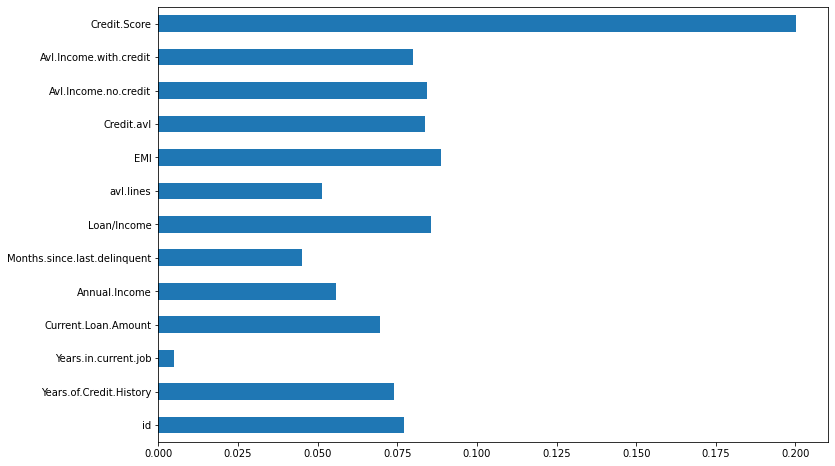

In [66]:
importances = pd.Series(forest_model.feature_importances_,index=final_train.columns)
importances.plot(kind='barh', figsize=(12,8))

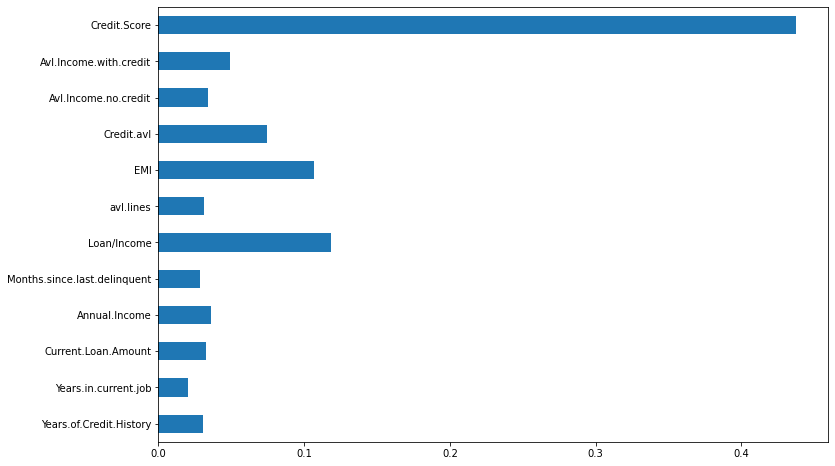

In [30]:
importances = pd.Series(clf.feature_importances_,index=final_train.columns)
importances.plot(kind='barh', figsize=(12,8))